## 目标监测简介

目标检测的发展可以分为两个阶段：**传统检测算法**和**基于深度学习的检测算法**。

### 传统监测算法

传统的目标检测算法是通过将**人为设计的目标特征**和**机器学习的分类器**相结合来实现的。

### 基于深度学习的检测算法

基于深度学习的检测算法可分为两类，

- 一类是使用基于候选区域（Region Proposal）的方法先找出图片中可能存在目标的区域，然后通过卷积神经网络对该区域进行分类；
- 另一类是直接使用卷积神经网络预测目标所属类别的概率和其在图片中的位置坐标。

由于深度学习的崛起，推动了目标检测的快速发展和应用，如今目标检测已经广泛的应用于我们的日常生活中，如自动驾驶、安保监控、医疗影像、机器视觉等领域。
虽然目标检测在发展过程中取得了很多成果，但同时也面临很多挑战，例如目标检测在实时性、抗干扰性、工业的大规模应用等方面还存在很多阻碍。


## 滑动窗口

### 传统目标检测方法流程

当我们构建一个传统的目标检测方法时，首先需要提供待检测图片，然后将**滑动窗口（Sliding Windows）**和**图像金字塔（Image Pyramid）**这两种方法相结合，从图片中选择出一些区域。
接下来通过一些算法提取出这些区域的特征信息，然后通过机器学习的分类器对提取的特征分类。
目标检测的输出结果一般是使用矩形框标记出要检测的目标，但是使用滑动窗口和图像金字塔时在同一个目标上会标记出多个矩形框，所以我们需要使用**非极大值抑制（Non-maxima suppression）**来剔除多余的矩形框，确保每个目标只用一个矩形框标记。

在接下来的几节实验课程，我们将逐一学习上述内容提到的方法。

### 滑动窗口介绍

滑动窗口（Sliding Windows）在目标检测过程中的作用是定位目标（物体、动物等）在图片中的位置。
在计算机视觉中滑动窗口是一个矩形框，它沿着从左向右、从上向下的方向在图片上滑动以达到提取出图片中每一个区域的目的。
下图就是一个滑动窗口的例子，可以看到一个绿色矩形框沿着从左向右、从上向下的方向在图片上滑动。对于矩形框滑过的每一区域，我们使用分类器来判断该区域中是否存在物体。

![滑动窗口演示](../dataset/1_slide_windows/滑动窗口演示.gif)

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

然后我们定义一个函数 sliding_window 用于获取滑动窗口。这个函数有三个参数 image、window 和 step。

- 第一个参数 image 是输入函数的图片，我们将用矩形框在这个图片上滑动。
- 第二个参数 window 是一个元组，表示滑动的矩形框的高和宽。
- 第三个参数 step 表示矩形框间隔多少个像素移动一次，这里我们可以称之为步长。

In [12]:
def sliding_window(image, window, step):
    """用于获取滑动窗口的坐标

    Args:
        image ([type]): [description]
        window ([type]): [description]
        step ([type]): [description]

    Yields:
        [type]: [description]
    """
    for y in range(0, image.shape[0] - window[1], step): # 控制框上下移动
        for x in range(0, image.shape[1] - window[0], step): # 控制框左右移动
            yield (x, y, image[y:y + window[1], x:x + window[0]]) # 返回框的左上角坐标和图像的截取部分

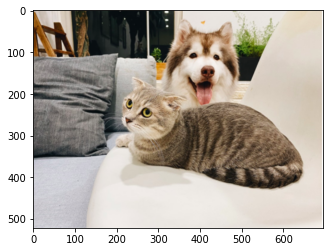

In [52]:
# 选取一张图片作为例子
image = cv2.imread("../dataset/1_slide_windows/pets.jpg") # 读取样例图像
(window_w, window_h) = (200, 200) # 定义滑动窗口的大小
plt.imshow(image[:,:,::-1]) # 图像显示

<class 'numpy.ndarray'>


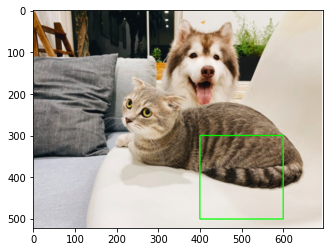

In [53]:
for (x, y, window) in sliding_window(image, (window_w, window_h), 100):
    if window.shape[0] != window_w or window.shape[1] != window_h: # 如果获得的窗口小（到了边缘）
        continue
        
    clone = image.copy()
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), (0, 255, 0), 2) # 在原始图像上画上框
    clone = clone[:,:,::-1]
    plt.imshow(clone)
    plt.pause(1) 
    display.clear_output(wait=True)